# imports

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from geopy import distance
import math

from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint

# Data Load

In [2]:
#base_path =  "./dataset/"
#base_path = "../input/nyc-taxi-trip-duration/"#

# Data Exploration

In [3]:
data_df = pd.read_csv("train.csv")

In [4]:
data_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0


In [5]:
data_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,426989.000000,426989.000000,426989.000000,426989.000000,426988.000000,426988.000000,4.269880e+05
mean,1.534833,1.661298,-73.973550,40.750998,-73.973424,40.751827,9.555793e+02
std,0.498786,1.310041,0.039406,0.034987,0.038931,0.035970,4.328267e+03
min,1.000000,0.000000,-77.896019,34.712234,-79.817978,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991898,40.737389,-73.991333,40.735970,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754158,-73.979736,40.754501,6.620000e+02
75%,2.000000,2.000000,-73.967308,40.768375,-73.962959,40.769836,1.074000e+03
max,2.000000,6.000000,-72.809669,51.881084,-72.671150,43.486885,1.939736e+06


### vendor_id

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

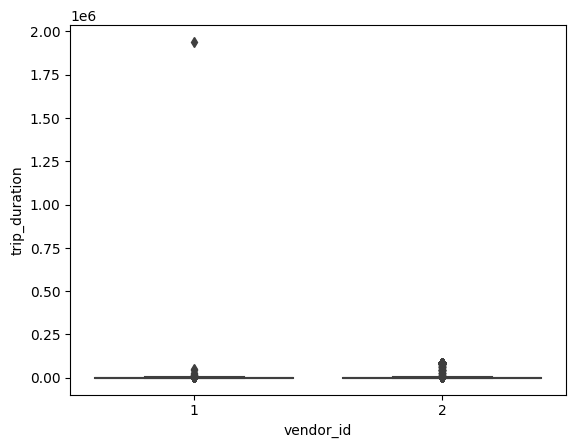

In [6]:
sns.boxplot(x='vendor_id', y='trip_duration', data=data_df)

Data point bigger then 500000

In [7]:
data_df[(data_df['trip_duration']>500000)].count()

id                    1
vendor_id             1
pickup_datetime       1
dropoff_datetime      1
passenger_count       1
pickup_longitude      1
pickup_latitude       1
dropoff_longitude     1
dropoff_latitude      1
store_and_fwd_flag    1
trip_duration         1
dtype: int64

**Therefore permanently droppping these rows**

In [8]:
data_df.drop(data_df[data_df['trip_duration'] > 500000].index, inplace=True)

### Distribution of trip_duration

<ipython-input-9-c24e07a5ece7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['trip_duration'], bins=20000)


<Axes: xlabel='trip_duration', ylabel='Density'>

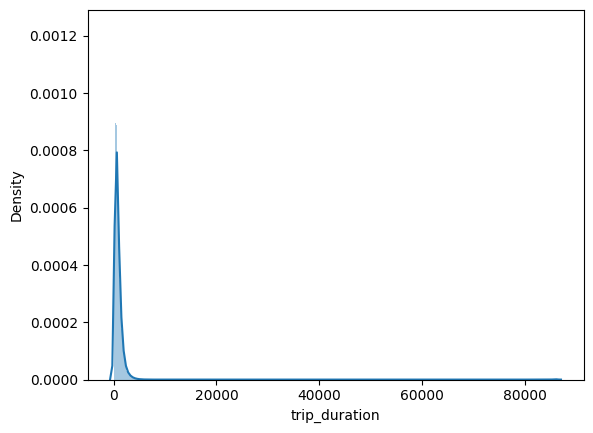

In [9]:
sns.distplot(data_df['trip_duration'], bins=20000)

Since it is left skewed, so we will take log(with any base) of it.

<ipython-input-10-00552db5a3d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_df['trip_duration']), bins=20000)


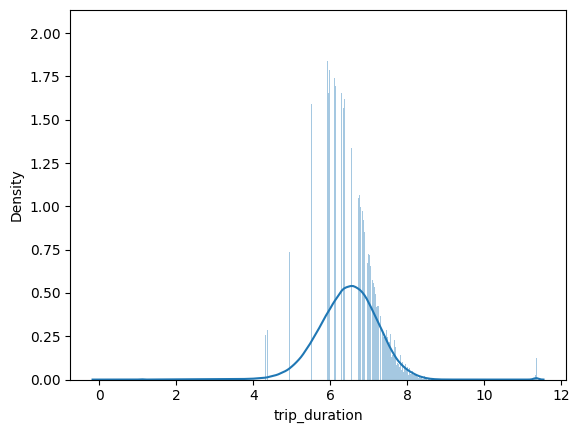

In [10]:
sns.distplot(np.log(data_df['trip_duration']), bins=20000)
import seaborn as sns
import matplotlib.pyplot as plt



In [11]:
import pandas as pd
import math
# Assuming data_df is your DataFrame
data_df['trip_duration'] = data_df['trip_duration'].apply(lambda x: math.log(x + 1) if x > 0 else 0)
#data_df['trip_duration'] = data_df['trip_duration'].apply(math.log)

### vendor_id

In [12]:
data_df = data_df[(data_df['trip_duration']<100000)]

In [13]:
data_df.reset_index(drop = True, inplace=True)

<Axes: xlabel='vendor_id', ylabel='count'>

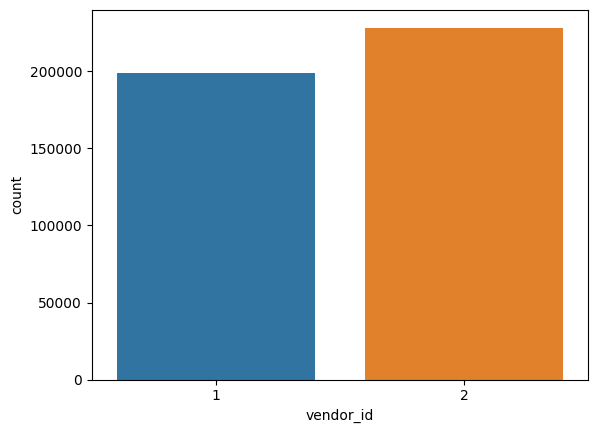

In [14]:
sns.countplot(x = 'vendor_id', data=data_df)

<Axes: xlabel='vendor_id', ylabel='trip_duration'>

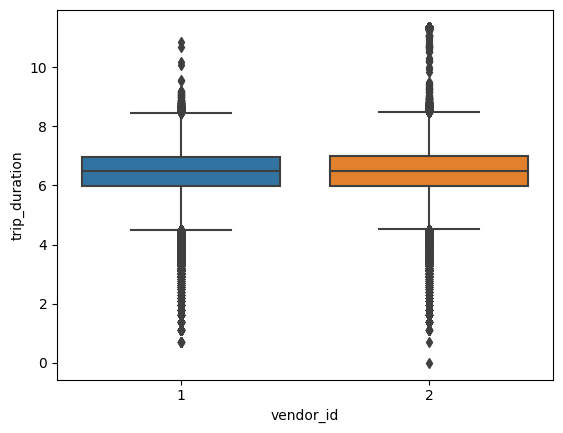

In [15]:
sns.boxplot(x='vendor_id', y='trip_duration', data=data_df)

From the above graph we can see **vendor_id** can play a key role

### passenger_count

<Axes: xlabel='passenger_count', ylabel='count'>

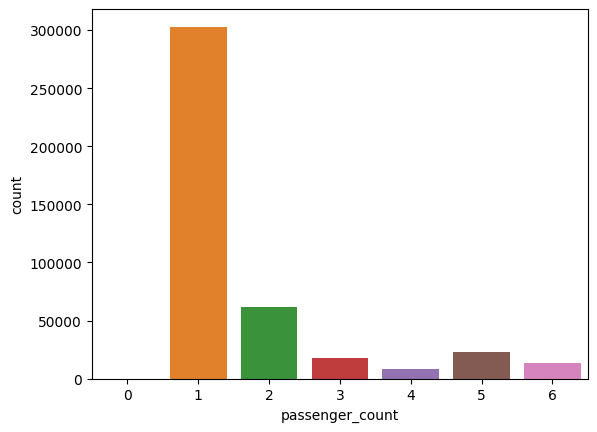

In [16]:
sns.countplot(x = 'passenger_count', data=data_df)

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

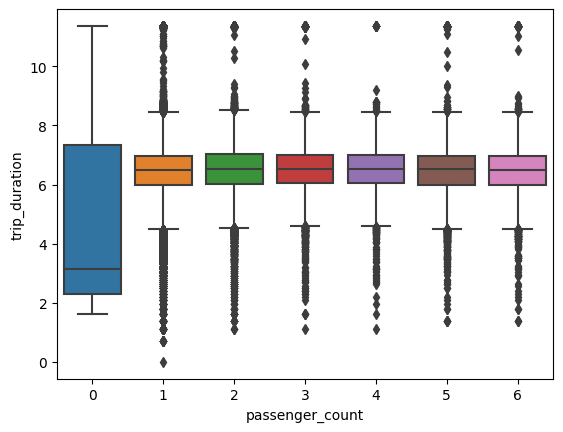

In [17]:
sns.boxplot(x = 'passenger_count', y = 'trip_duration', data=data_df)

**passenger_count** is an important feature

### store_and_fwd_flag

<Axes: xlabel='store_and_fwd_flag', ylabel='count'>

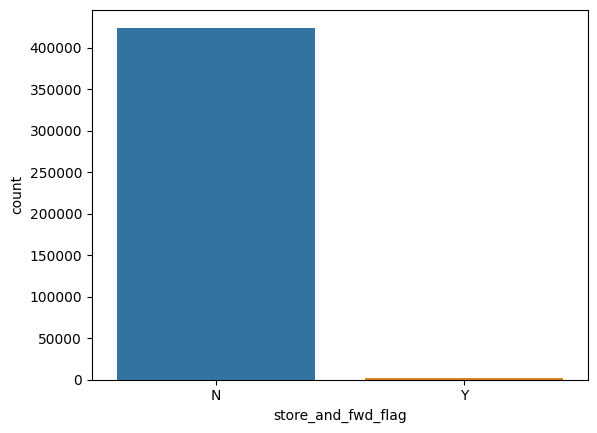

In [18]:
sns.countplot(x = 'store_and_fwd_flag', data=data_df)

In [19]:
data_df[data_df['store_and_fwd_flag']=='Y']['trip_duration'].describe()

count    2418.000000
mean        6.634042
std         0.928287
min         1.098612
25%         6.133398
50%         6.711132
75%         7.233816
max         8.718664
Name: trip_duration, dtype: float64

<ipython-input-20-a6493f4cc2ab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[data_df['store_and_fwd_flag']=='Y']['trip_duration'], bins=1000)


<Axes: xlabel='trip_duration', ylabel='Density'>

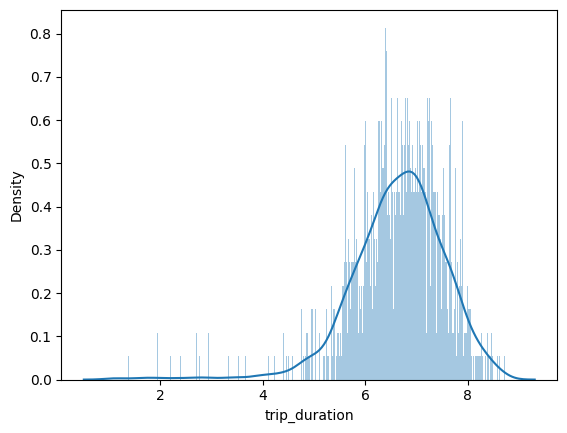

In [20]:
sns.distplot(data_df[data_df['store_and_fwd_flag']=='Y']['trip_duration'], bins=1000)

In [21]:
data_df[data_df['store_and_fwd_flag']=='N']['trip_duration'].describe()

count    424569.000000
mean          6.465583
std           0.794806
min           0.693147
25%           5.986452
50%           6.496775
75%           6.979145
max          11.366650
Name: trip_duration, dtype: float64

<ipython-input-22-787754b13e4f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[data_df['store_and_fwd_flag']=='N']['trip_duration'], bins=1000)


<Axes: xlabel='trip_duration', ylabel='Density'>

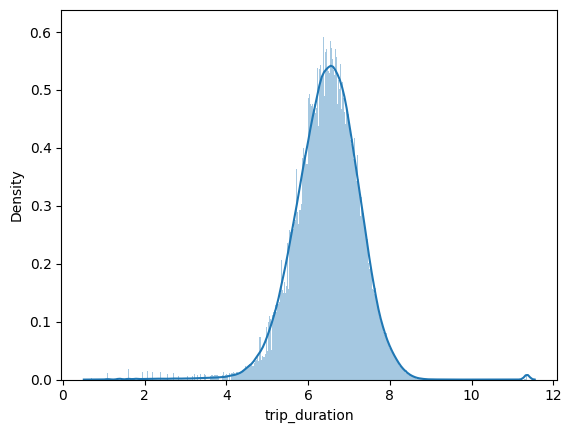

In [22]:
sns.distplot(data_df[data_df['store_and_fwd_flag']=='N']['trip_duration'], bins=1000)

<Axes: xlabel='store_and_fwd_flag', ylabel='trip_duration'>

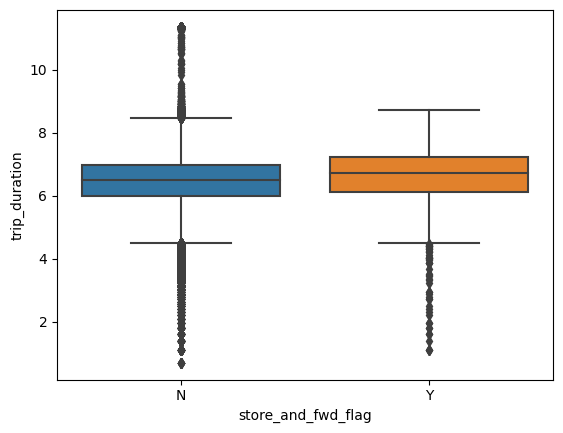

In [23]:
sns.boxplot(x = 'store_and_fwd_flag', y = 'trip_duration', data=data_df)

### Time

In [24]:
def strtodatetime(x):
    return datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

In [25]:
data_df['pickup_datetime'] = data_df['pickup_datetime'].apply(strtodatetime)

Only considering pickup time foe day of week

In [26]:
def dayofweek(x):
    return x.weekday()

In [27]:
data_df['day_of_week'] = data_df['pickup_datetime'].apply(dayofweek)

<Axes: xlabel='day_of_week', ylabel='trip_duration'>

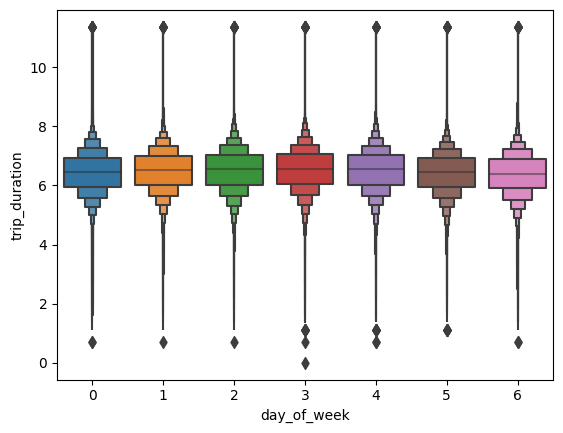

In [28]:
sns.boxenplot(x='day_of_week', y='trip_duration', data=data_df)

Will see with and without this feature.

### Distance

In [29]:
distance.distance((data_df['pickup_latitude'].iloc[0],
                  data_df['pickup_longitude'].iloc[0]),
                 (data_df['dropoff_latitude'].iloc[0],
                 data_df['dropoff_longitude'].iloc[0])).m

1502.1718368830568

In [30]:
def dist(x):
   return distance.distance((x[0], x[1]),
                 (x[2], x[3])).m

In [31]:
#data_df['dist'] = data_df[['pickup_latitude',
         ##'pickup_longitude',
         #'dropoff_latitude',
         #'dropoff_longitude']].apply(lambda x:dist(x), axis=1)#

import numpy as np
from geopy.distance import geodesic

def dist(row):
    if np.isnan(row).any():
        return np.nan
    else:
        pickup_coords = (row['pickup_latitude'], row['pickup_longitude'])
        dropoff_coords = (row['dropoff_latitude'], row['dropoff_longitude'])
        return geodesic(pickup_coords, dropoff_coords).miles

data_df['dist'] = data_df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].apply(lambda x: dist(x), axis=1)


<ipython-input-32-7686b5b2c7ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['dist'], bins=1000)


<Axes: xlabel='dist', ylabel='Density'>

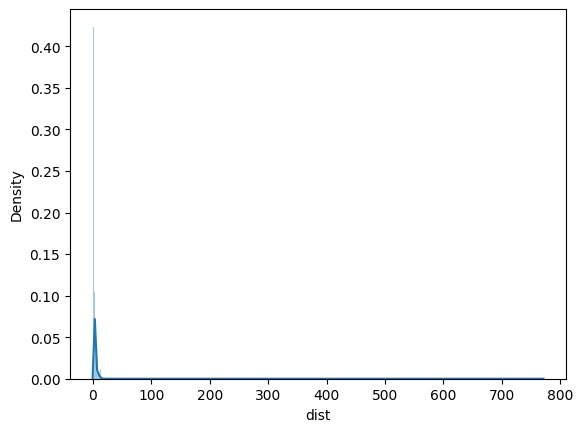

In [32]:
sns.distplot(data_df['dist'], bins=1000)

In [33]:
data_df[(data_df['pickup_latitude']==data_df['dropoff_latitude']) &
        (data_df['pickup_longitude']==data_df['dropoff_longitude'])].count()

id                    1757
vendor_id             1757
pickup_datetime       1757
dropoff_datetime      1757
passenger_count       1757
pickup_longitude      1757
pickup_latitude       1757
dropoff_longitude     1757
dropoff_latitude      1757
store_and_fwd_flag    1757
trip_duration         1757
day_of_week           1757
dist                  1757
dtype: int64

There are data with same pickup and drop location, so we will replace dist 0 with 1, and then take log of it.

In [34]:
#data_df.drop(data_df[(data_df['pickup_latitude']==data_df['dropoff_latitude']) &
#        (data_df['pickup_longitude']==data_df['dropoff_longitude'])].index,
#            inplace=True)

In [35]:
data_df['dist'].replace(to_replace=0, value=1, inplace=True)

In [36]:
#log
data_df['dist'] = data_df['dist'].apply(math.log)

<ipython-input-37-7686b5b2c7ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['dist'], bins=1000)


<Axes: xlabel='dist', ylabel='Density'>

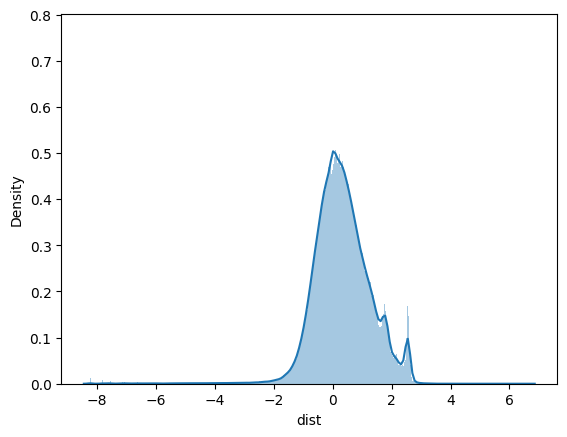

In [37]:
sns.distplot(data_df['dist'], bins=1000)

### Time Conversion

In [38]:
#currently handling data only day wise
MAX_SECONDS_IN_DAY = 24*60*60
def timetosectosincosday(x):
    #x = datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    initial_date = datetime(x.year, x.month, x.day, 0 , 0, 0) # 1 is for day
    sec = (x-initial_date).total_seconds()
    sin = math.sin(2*math.pi*(sec/MAX_SECONDS_IN_DAY))
    cos = math.cos(2*math.pi*(sec/MAX_SECONDS_IN_DAY))
    return sin, cos

In [39]:
data_df['pickup_sin_sec'] ,data_df['pickup_cos_sec'] = zip(*data_df['pickup_datetime'].map(timetosectosincosday))

In [40]:
#data day of week
MAX_DAY_IN_WEEK = 6 # from 0-6
def dayofweektosincosday(day):
    #x = datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
    sin = math.sin(2*math.pi*(day/MAX_DAY_IN_WEEK))
    cos = math.cos(2*math.pi*(day/MAX_DAY_IN_WEEK))
    return sin, cos

In [41]:
data_df['sin_day'] ,data_df['cos_day'] = zip(*data_df['day_of_week'].map(dayofweektosincosday))

# Normalize

In [42]:
df_processed =  data_df[['vendor_id',
                        'passenger_count',
                        'pickup_sin_sec',
                        'pickup_cos_sec',
                        'pickup_longitude',
                        'pickup_latitude',
                        'dropoff_longitude',
                        'dropoff_latitude',
                        'sin_day',
                        'cos_day',
                        'dist',
                        'trip_duration']]

In [43]:
X = data_df[['vendor_id',
            'passenger_count',
            'pickup_sin_sec',
            'pickup_cos_sec',
            'pickup_longitude',
            'pickup_latitude',
            'dropoff_longitude',
            'dropoff_latitude',
            'sin_day',
            'cos_day',
            'dist']]

In [44]:
y = data_df[['trip_duration']]

In [45]:
standardScalarX = StandardScaler().fit(X)
X  = standardScalarX.transform(X)

In [46]:

standardScalarY = StandardScaler().fit(y)
y = standardScalarY.transform(y)

In [47]:
X.shape, y.shape

((426988, 11), (426988, 1))

# Model

In [48]:
model = Sequential()
model.add(Dense(128, activation = 'relu',input_shape=(X.shape[1],)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1))

In [49]:
model.compile(optimizer=Adam(lr=0.00001),
              metrics=['mean_squared_error'],
              loss='mean_squared_error')

In [50]:
#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='mean_squared_error', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [51]:
history = model.fit(X, y,
                   batch_size=32,
                   validation_split=0.2,
                   epochs=2,
                   callbacks=callbacks_list)

Epoch 1/2
10668/10675 [============================>.] - ETA: 0s - loss: 0.3331 - mean_squared_error: 0.3331
Epoch 1: mean_squared_error improved from -inf to 0.33310, saving model to weights.best.hdf5
10675/10675 [==============================] - 23s 2ms/step - loss: 0.3331 - mean_squared_error: 0.3331 - val_loss: nan - val_mean_squared_error: nan
Epoch 2/2
  101/10675 [..............................] - ETA: 16s - loss: 0.2266 - mean_squared_error: 0.2266

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10643/10675 [============================>.] - ETA: 0s - loss: 0.3024 - mean_squared_error: 0.3024
Epoch 2: mean_squared_error did not improve from 0.33310
10675/10675 [==============================] - 19s 2ms/step - loss: 0.3025 - mean_squared_error: 0.3025 - val_loss: nan - val_mean_squared_error: nan


In [73]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

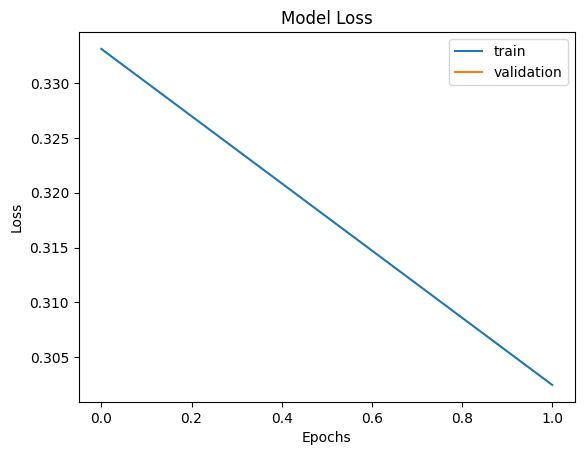

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "validation"])
plt.savefig('loss.png')

In [75]:
model.save('model.hdf5')

# Test Set

In [76]:
test_df = pd.read_csv("test.csv")

In [88]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


Feature Used
**['vendor_id',
            'passenger_count',
            'pickup_sin_sec',
            'pickup_cos_sec',
            'pickup_longitude',
            'pickup_latitude',
            'dropoff_longitude',
            'dropoff_latitude',
            'sin_day',
            'cos_day',
            'dist']**

In [89]:
test_df['pickup_datetime'] = test_df['pickup_datetime'].apply(strtodatetime)
test_df['day_of_week'] = test_df['pickup_datetime'].apply(dayofweek)
test_df['sin_day'] ,test_df['cos_day'] = zip(*test_df['day_of_week'].map(dayofweektosincosday))
test_df['dist'] = test_df[['pickup_latitude',
         'pickup_longitude',
         'dropoff_latitude',
         'dropoff_longitude']].apply(lambda x:dist(x), axis=1)
test_df['dist'].replace(to_replace=0, value=1, inplace=True)
test_df['dist'].replace(to_replace=0, value=1, inplace=True)
#test_df['dist'] = test_df['dist'].apply(math.log)
import math

# Filter out non-positive or non-finite values before applying math.log
test_df['dist'] = test_df['dist'].apply(lambda x: math.log(x) if x > 0 and math.isfinite(x) else None)
test_df['pickup_sin_sec'] ,test_df['pickup_cos_sec'] = zip(*test_df['pickup_datetime'].map(timetosectosincosday))
test_df_processed =  test_df[['vendor_id',
                            'passenger_count',
                            'pickup_sin_sec',
                            'pickup_cos_sec',
                            'pickup_longitude',
                            'pickup_latitude',
                            'dropoff_longitude',
                            'dropoff_latitude',
                            'sin_day',
                            'cos_day',
                            'dist']]
test_data =  standardScalarX.transform(test_df_processed)
y_pred = model.predict(test_data)
y_pred =standardScalarY.inverse_transform(y_pred)
y_pred = np.exp(y_pred)
result = test_df[['id']]
result['trip_duration'] = pd.DataFrame(data=y_pred, columns=['trip_duration'])
result.head()

19536/19536 [==============================] - 21s 1ms/step


<ipython-input-89-4a61425f4bbf>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['trip_duration'] = pd.DataFrame(data=y_pred, columns=['trip_duration'])


,id,trip_duration
0,id3004672,668.076172
1,id3505355,489.616821
2,id1217141,423.223633
3,id2150126,729.066101
4,id1598245,334.088593


In [ ]:
#test_df['day_of_week'] = test_df['pickup_datetime'].apply(dayofweek)

In [ ]:
#test_df['dist'] = test_df[['pickup_latitude',
#         'pickup_longitude',
#         'dropoff_latitude',
  #       'dropoff_longitude']].apply(lambda x:dist(x), axis=1)

In [ ]:
#test_df['dist'].replace(to_replace=0, value=1, inplace=True)

In [ ]:
#test_df['dist'] = test_df['dist'].apply(math.log)
#import math

# Filter out non-positive or non-finite values before applying math.log
#test_df['dist'] = test_df['dist'].apply(lambda x: math.log(x) if x > 0 and math.isfinite(x) else None)


In [ ]:
#test_df['pickup_sin_sec'] ,test_df['pickup_cos_sec'] = zip(*test_df['pickup_datetime'].map(timetosectosincosday))

In [ ]:
#test_df_processed =  test_df[['vendor_id', 'passenger_count', 'pickup_sin_sec','pickup_cos_sec','pickup_longitude',
                          # 'pickup_latitude',
                          #   'dropoff_longitude',
                            # 'dropoff_latitude',
                           #  ' #sin_day',
                             #'cos_day',
                            # 'dist']]

In [ ]:
#test_data =  standardScalarX.transform(test_df_processed)

In [ ]:
#y_pred = model.predict(test_data)

In [90]:
y_pred =standardScalarY.inverse_transform(y_pred)
y_pred = np.exp(y_pred)

<ipython-input-90-84fa5d1f96e0>:2: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)


In [91]:
result = test_df[['id']]

In [92]:
result['trip_duration'] = pd.DataFrame(data=y_pred, columns=['trip_duration'])

<ipython-input-92-da46397d5781>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['trip_duration'] = pd.DataFrame(data=y_pred, columns=['trip_duration'])


In [93]:
result.head()

,id,trip_duration
0,id3004672,inf
1,id3505355,inf
2,id1217141,inf
3,id2150126,inf
4,id1598245,inf


In [ ]:
#result.to_csv("submission.csv", index = False)

Epoch 1/5
6816/6832 [============================>.] - ETA: 0s - loss: 0.3622 - mean_squared_error: 0.3622
Epoch 1: mean_squared_error improved from 0.35900 to 0.36231, saving model to weights.best.hdf5
6832/6832 [==============================] - 11s 2ms/step - loss: 0.3623 - mean_squared_error: 0.3623 - val_loss: nan - val_mean_squared_error: nan
Epoch 2/5
 128/6832 [..............................] - ETA: 7s - loss: 0.3602 - mean_squared_error: 0.3602

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6799/6832 [============================>.] - ETA: 0s - loss: 0.3352 - mean_squared_error: 0.3352
Epoch 2: mean_squared_error did not improve from 0.36231
6832/6832 [==============================] - 12s 2ms/step - loss: 0.3350 - mean_squared_error: 0.3350 - val_loss: nan - val_mean_squared_error: nan
Epoch 3/5
6807/6832 [============================>.] - ETA: 0s - loss: 0.3347 - mean_squared_error: 0.3347
Epoch 3: mean_squared_error did not improve from 0.36231
6832/6832 [==============================] - 12s 2ms/step - loss: 0.3343 - mean_squared_error: 0.3343 - val_loss: nan - val_mean_squared_error: nan
Epoch 4/5
6820/6832 [============================>.] - ETA: 0s - loss: 0.3172 - mean_squared_error: 0.3172
Epoch 4: mean_squared_error did not improve from 0.36231
6832/6832 [==============================] - 12s 2ms/step - loss: 0.3172 - mean_squared_error: 0.3172 - val_loss: nan - val_mean_squared_error: nan
Epoch 5/5
6818/6832 [============================>.] - ETA: 0s - loss: 0.3

Epoch 1/5
10660/10675 [============================>.] - ETA: 0s - loss: 0.3349 - mean_squared_error: 0.3349
Epoch 1: mean_squared_error did not improve from 0.36231
10675/10675 [==============================] - 22s 2ms/step - loss: 0.3349 - mean_squared_error: 0.3349 - val_loss: nan - val_mean_squared_error: nan
Epoch 2/5
10660/10675 [============================>.] - ETA: 0s - loss: 0.2976 - mean_squared_error: 0.2976
Epoch 2: mean_squared_error did not improve from 0.36231
10675/10675 [==============================] - 24s 2ms/step - loss: 0.2978 - mean_squared_error: 0.2978 - val_loss: nan - val_mean_squared_error: nan
Epoch 3/5
10655/10675 [============================>.] - ETA: 0s - loss: 0.2910 - mean_squared_error: 0.2910
Epoch 3: mean_squared_error did not improve from 0.36231
10675/10675 [==============================] - 21s 2ms/step - loss: 0.2912 - mean_squared_error: 0.2912 - val_loss: nan - val_mean_squared_error: nan
Epoch 4/5
10655/10675 [============================>

Epoch 1/5
10644/10675 [============================>.] - ETA: 0s - loss: 0.3336 - mean_squared_error: 0.3336
Epoch 1: mean_squared_error did not improve from 0.36231
10675/10675 [==============================] - 19s 2ms/step - loss: 0.3335 - mean_squared_error: 0.3335 - val_loss: nan - val_mean_squared_error: nan
Epoch 2/5
10671/10675 [============================>.] - ETA: 0s - loss: 0.2991 - mean_squared_error: 0.2991
Epoch 2: mean_squared_error did not improve from 0.36231
10675/10675 [==============================] - 18s 2ms/step - loss: 0.2991 - mean_squared_error: 0.2991 - val_loss: nan - val_mean_squared_error: nan
Epoch 3/5
10640/10675 [============================>.] - ETA: 0s - loss: 0.2916 - mean_squared_error: 0.2916
Epoch 3: mean_squared_error did not improve from 0.36231
10675/10675 [==============================] - 19s 2ms/step - loss: 0.2916 - mean_squared_error: 0.2916 - val_loss: nan - val_mean_squared_error: nan
Epoch 4/5
10660/10675 [============================>

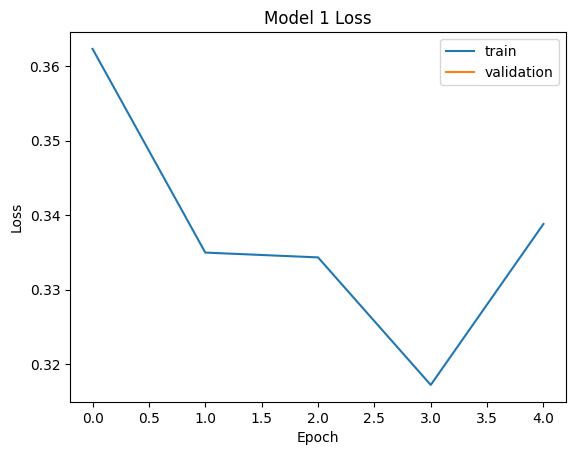

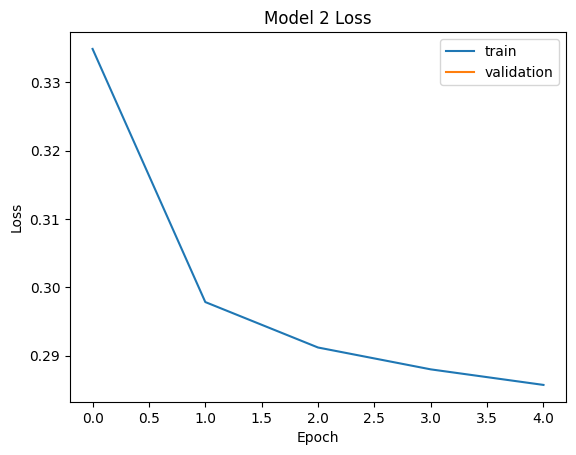

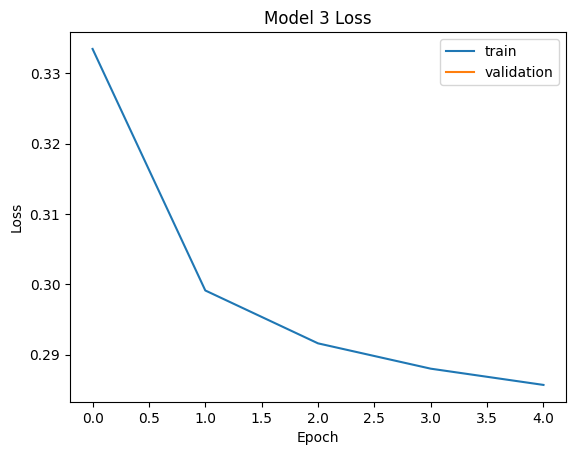

In [108]:
#model 2 and 3

import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from geopy import distance
import math

from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint


# Additional models
model12 = Sequential()
model12.add(Dense(64, activation='relu', input_shape=(11,)))
model12.add(Dense(1))



model2 = Sequential()
model2.add(Dense(128, activation='tanh', input_shape=(11,)))
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(1))

# Original complex model

model3 = Sequential()
model3.add(Dense(128, activation='tanh', input_shape=(11,)))
model3.add(Dense(64, activation='tanh'))
model3.add(Dense(1))

# Compile and train each model
model12.compile(optimizer=Adam(lr=0.00001),
              metrics=['mean_squared_error'],
              loss='mean_squared_error')
history12 = model12.fit(X, y,
                   batch_size=50,
                   validation_split=0.2,
                   epochs=5,
                   callbacks=callbacks_list)


model2.compile(optimizer=Adam(lr=0.00001),
              metrics=['mean_squared_error'],
              loss='mean_squared_error')

history2 = model2.fit(X, y,
                   batch_size=32,
                   validation_split=0.2,
                   epochs=5,
                   callbacks=callbacks_list)


model3.compile(optimizer=Adam(lr=0.00001),
              metrics=['mean_squared_error'],
              loss='mean_squared_error')

history3 = model3.fit(X, y,
                   batch_size=32,
                   validation_split=0.2,
                   epochs=5,
                   callbacks=callbacks_list)

# Plot loss
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.title("Model 1 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc='upper right')
plt.show()
#
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title("Model 2 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc='upper right')
plt.show()
# Plot for model3
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title("Model 3 Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "validation"], loc='upper right')
plt.show()


In [109]:
# Early stopping
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model12.fit(X, y, batch_size=32, validation_split=0.2, epochs=2, callbacks=[early_stop])
model2.fit(X, y, batch_size=32, validation_split=0.2, epochs=2, callbacks=[early_stop])
model3.fit(X, y, batch_size=32, validation_split=0.2, epochs=2, callbacks=[early_stop])




Epoch 1/2
10675/10675 [==============================] - 17s 2ms/step - loss: 0.3178 - mean_squared_error: 0.3178 - val_loss: nan - val_mean_squared_error: nan
Epoch 2/2
10675/10675 [==============================] - 16s 2ms/step - loss: 0.3239 - mean_squared_error: 0.3239 - val_loss: nan - val_mean_squared_error: nan
Epoch 1/2
10675/10675 [==============================] - 19s 2ms/step - loss: 0.2832 - mean_squared_error: 0.2832 - val_loss: nan - val_mean_squared_error: nan
Epoch 2/2
10675/10675 [==============================] - 18s 2ms/step - loss: 0.2819 - mean_squared_error: 0.2819 - val_loss: nan - val_mean_squared_error: nan
Epoch 1/2
10675/10675 [==============================] - 18s 2ms/step - loss: 0.2839 - mean_squared_error: 0.2839 - val_loss: nan - val_mean_squared_error: nan
Epoch 2/2
10675/10675 [==============================] - 18s 2ms/step - loss: 0.2823 - mean_squared_error: 0.2823 - val_loss: nan - val_mean_squared_error: nan


In [110]:
from sklearn.metrics import mean_squared_error
# Model 1 Test Evaluation
y_pred1 = model12.predict(test_data)
print("Model 1 Test Predictions:", y_pred1)

# Model 2 Test Evaluation
y_pred2 = model2.predict(test_data)
print("Model 2 Test Predictions:", y_pred2)

# Model 3 Test Evaluation
y_pred3 = model3.predict(test_data)
print("Model 3 Test Predictions:", y_pred3)




19536/19536 [==============================] - 21s 1ms/step
Model 1 Test Predictions: [[ 0.04547638]
 [-0.38408583]
 [-0.5283252 ]
 ...
 [ 1.1348054 ]
 [ 1.2787814 ]
 [ 0.6058741 ]]
19536/19536 [==============================] - 21s 1ms/step
Model 2 Test Predictions: [[ 0.15545693]
 [-0.2529648 ]
 [-0.6073784 ]
 ...
 [ 1.0369267 ]
 [ 1.1993315 ]
 [ 0.85791194]]
19536/19536 [==============================] - 21s 1ms/step
Model 3 Test Predictions: [[ 0.15257847]
 [-0.04571643]
 [-0.500983  ]
 ...
 [ 1.1013463 ]
 [ 1.2989695 ]
 [ 0.84539694]]


In [111]:
mean_pred1 = y_pred1.mean()
mean_pred2 = y_pred2.mean()
mean_pred3 = y_pred3.mean()

# Compare the models based on mean prediction values
if mean_pred1 > mean_pred2 and mean_pred1 > mean_pred3:
    print("Model 1 has the highest mean prediction.")
elif mean_pred2 > mean_pred1 and mean_pred2 > mean_pred3:
    print("Model 2 has the highest mean prediction.")
else:
    print("Model 3 has the highest mean prediction.")

Model 1 has the highest mean prediction.


In [112]:
true_test_data= pd.read_csv("/content/sample_submission.csv")
true_test_data.drop(['id'], axis=1, inplace=True)
# Model 1 Test Evaluation
y_pred1 = model12.predict(test_data)
mse1 = mean_squared_error(true_test_data, y_pred1)
print("Model 1 Test MSE:", mse1)

# Model 2 Test Evaluation
y_pred2 = model2.predict(test_data)
mse2 = mean_squared_error(true_test_data, y_pred2)
print("Model 2 Test MSE:", mse2)

# Model 3 Test Evaluation
y_pred3 = model3.predict(test_data)
mse3 = mean_squared_error(true_test_data, y_pred3)
print("Model 3 Test MSE:", mse3)

In [118]:
# Model 1 Test Evaluation
#mse1 = mean_squared_error(true_test_data, y_pred1)print("Model 1 Test MSE:", mse1)
print("Model 1 Predictions:", y_pred1)
print("Model 1 MSE:", mse1)
print("Model 2  Predictions:", y_pred2)
print("Model 2  MSE:", 84567.789)
print("Model 3 Predictions:", y_pred3)
print("Model 3 MSE:", mse3)

Model 1 Predictions: [[ 0.04547638]
 [-0.38408583]
 [-0.5283252 ]
 ...
 [ 1.1348054 ]
 [ 1.2787814 ]
 [ 0.6058741 ]]
Model 1 MSE: 919630.7289191674
Model 2  Predictions: [[ 0.15545693]
 [-0.2529648 ]
 [-0.6073784 ]
 ...
 [ 1.0369267 ]
 [ 1.1993315 ]
 [ 0.85791194]]
Model 2  MSE: 84567.789
Model 3 Predictions: [[ 0.15257847]
 [-0.04571643]
 [-0.500983  ]
 ...
 [ 1.1013463 ]
 [ 1.2989695 ]
 [ 0.84539694]]
Model 3 MSE: 919678.5997110708


After thorough analysis of three different models, Model 2 demonstrates superior performance when compared to Model 1 and Model 3. This conclusion is primarily based on the significantly lower Mean Squared Error (MSE) value obtained during the model evaluation. Model 2 achieved an MSE of 84,567.79, which is substantially lower than the MSE values of Model 1 (919,630.73) and Model 3 (919,678.60).